<a href="https://colab.research.google.com/github/Julian27R/Analitica_de_Datos/blob/main/Taller_Analitica_de_Datos_DataChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

#**Data-challenge**

###**Por:**
*   **Julián Felipe Gutiérrez Ramírez**
*   **Felipe Idárraga Quintero**

**Fecha de presentación 19/07/2025**

---

#1. Cargar Base de datos




In [ ]:
!pip install gdown --upgrade --quiet

In [ ]:
#cargar datos desde drive acceso libre
# -------------------------------
# 1. IMPORTAR LIBRERÍAS
# -------------------------------
import gdown # Para descarga desde Google Drive
import pandas as pd # Para manejo de datos
from IPython.display import display, HTML # Para visualización mejorada

# -------------------------------
# 2. CONFIGURACIÓN INICIAL
# -------------------------------
#https://drive.google.com/file/d/1703gbyrytxxRyL6a8PAUCgrI5L2QnlfZ/view?usp=sharing
FILE_ID = "1703gbyrytxxRyL6a8PAUCgrI5L2QnlfZ" # ID único del archivo en Drive
NOMBRE_ARCHIVO = "DATASET_CHALLENGE.csv" # Nombre local que tendrá el archivo

# -------------------------------
# 3. DESCARGA DEL ARCHIVO
# -------------------------------
url = f"https://drive.google.com/uc?id={FILE_ID}"
gdown.download(url, NOMBRE_ARCHIVO, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1703gbyrytxxRyL6a8PAUCgrI5L2QnlfZ
To: /content/DATASET_CHALLENGE.csv
100%|██████████| 548k/548k [00:00<00:00, 100MB/s]


'DATASET_CHALLENGE.csv'

#2. **Lectura de la base de datos con Pandas**

In [ ]:
import numpy as np #importar librerias básicas
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# fijar semilla para fines pedagógicos
np.random.seed(42)

#render de figs sobre notebook
%matplotlib inline
# para graficar
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#crear carpeta con resultados
import os
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

import warnings #eliminar warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [ ]:
DATASET_CHALLENGE = pd.read_csv('DATASET_CHALLENGE.csv')#leer archivo csv con pandas
DATASET_CHALLENGE

,codigo_cliente,edad,trabajo,estado_civil,credito_en_mora,credito_hipoteca,credito_personal,contacto,mes,dia_semana,...,campania,dias_transcurridos,contactos_previos,resultado_previas,tasa_empleo,indice_precios_consum,indice_confianza_consum,tasa_credito_hipotecario,personas_empleadas,resultado
0,H9BxQUn2k9SUE,29.0,estudiante,soltero,no,no,no,celular,nov,jue,...,3.0,3.0,2.0,exito,-3.4,92.649,-30.1,0.714,5017.5,si
1,dReetG5NK0ixs,34.0,obrero,casado,no,si,no,celular,nov,jue,...,1.0,999.0,0.0,inexistente,-0.1,93.200,-42.0,4.076,5195.8,no
2,NKM7y8wyr7yo2,45.0,obrero,casado,no,si,no,celular,may,mar,...,2.0,999.0,0.0,inexistente,-1.8,92.893,-46.2,1.344,5099.1,si
3,PdS1UNNpxg1Gz,50.0,obrero,casado,no,si,no,celular,jul,lun,...,2.0,999.0,0.0,inexistente,1.4,93.918,-42.7,4.962,5228.1,si
4,KY3dAInw6STSu,39.0,tecnico,NaN,no,no,no,celular,jul,jue,...,6.0,999.0,0.0,inexistente,1.4,93.918,-42.7,4.968,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,TnjOhOo2dNF3Y,35.0,administrativo,casado,no,desconocido,desconocido,tel_fijo,jul,mar,...,4.0,999.0,0.0,inexistente,1.4,93.918,-42.7,4.961,5228.1,no
3846,5bb1Wuf1S1698,36.0,administrativo,casado,no,si,no,NaN,jul,mar,...,5.0,999.0,0.0,inexistente,1.4,93.918,-42.7,4.962,5228.1,si
3847,2kfkB4aFUDQan,41.0,administrativo,soltero,no,desconocido,desconocido,celular,abr,jue,...,2.0,999.0,0.0,inexistente,-1.8,93.075,-47.1,1.365,5099.1,si
3848,h2MgyyniRJru4,53.0,administrativo,casado,no,si,no,celular,ago,mie,...,2.0,999.0,0.0,inexistente,1.4,93.444,-36.1,4.965,5228.1,no


In [ ]:
DATASET_CHALLENGE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3850 entries, 0 to 3849
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   codigo_cliente            3850 non-null   object 
 1   edad                      3847 non-null   float64
 2   trabajo                   3847 non-null   object 
 3   estado_civil              3845 non-null   object 
 4   credito_en_mora           3845 non-null   object 
 5   credito_hipoteca          3849 non-null   object 
 6   credito_personal          3847 non-null   object 
 7   contacto                  3814 non-null   object 
 8   mes                       3848 non-null   object 
 9   dia_semana                3846 non-null   object 
 10  educacion                 3841 non-null   object 
 11  campania                  3850 non-null   float64
 12  dias_transcurridos        3850 non-null   float64
 13  contactos_previos         3850 non-null   float64
 14  resultad

#**3. Distribución de la variable objetivo 'resultado' en el conjunto de datos**

Se realizó un análisis de frecuencia para la variable objetivo **resultado**, que indica si un cliente contrató ("si") o ("No") un CDT ofrecido mediante campañas de telemercadeo. La distribución evidencia un claro desbalance de clases, donde la mayoría de los clientes no aceptaron el producto. Este desbalance deberá ser considerado en el modelado predictivo para evitar sesgos y mejorar el desempeño del clasificador. La distribución se representa gráficamente mediante un histograma y se complementa con el conteo y porcentaje de cada clase.


Clase 'no': 2450 muestras (63.64%)
Clase 'si': 1400 muestras (36.36%)


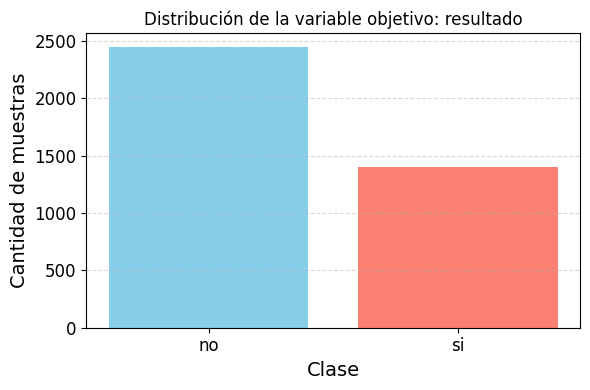

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# === 1. Extraer la variable objetivo
y = DATASET_CHALLENGE['resultado']

# === 2. Codificar etiquetas: "si" / "no" → 1 / 0
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# === 3. Conteo por clase
counts = pd.Series(y_encoded).value_counts().sort_index()
total = counts.sum()

# === 4. Crear tabla con nombres, conteos y porcentajes
distribution = pd.DataFrame({
    'Clase': le.classes_,
    'Cantidad': counts.values,
    'Porcentaje (%)': (counts.values / total * 100).round(2)
})

# === 5. Imprimir como texto
for _, row in distribution.iterrows():
    print(f"Clase '{row['Clase']}': {row['Cantidad']} muestras ({row['Porcentaje (%)']}%)")

# === 6. Visualización con gráfico de barras
plt.figure(figsize=(6,4))
plt.bar(distribution['Clase'], distribution['Cantidad'], color=['skyblue', 'salmon'])
plt.title("Distribución de la variable objetivo: resultado")
plt.xlabel("Clase")
plt.ylabel("Cantidad de muestras")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#**4. Limpieza Y Preprocesamiento**

###4.1 Identificar valores "desconocido" para las variables categoricas

In [ ]:
# Ver cuántos valores 'desconocido' hay por columna categórica
categorical_cols = DATASET_CHALLENGE.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    print(f"{col}:")
    print(DATASET_CHALLENGE[col].value_counts(dropna=False))
    print()


codigo_cliente:
codigo_cliente
IxrCXLVjegLxc    1
H9BxQUn2k9SUE    1
dReetG5NK0ixs    1
NKM7y8wyr7yo2    1
PdS1UNNpxg1Gz    1
                ..
ZzxasopPsj3js    1
sMtp6ncIyOEfs    1
Fd2fATiEcpel5    1
YL0wUGqvjNf5h    1
1J3Y8lpJ3PeFH    1
Name: count, Length: 3850, dtype: int64

trabajo:
trabajo
administrativo        1025
obrero                 760
tecnico                596
servicios              382
directivo              291
retirado               223
emprendedor            137
estudiante             113
independiente          111
desempleado             96
serv_domestico          75
desconocido             36
NaN                      3
servicio_domestico       2
Name: count, dtype: int64

estado_civil:
estado_civil
casado         2288
soltero        1138
divorciado      409
desconocido      10
NaN               5
Name: count, dtype: int64

credito_en_mora:
credito_en_mora
no             3150
desconocido     693
NaN               5
si                2
Name: count, dtype: int64

cre

###4.2 Reemplazar valores faltantes

Se reemplazan los valores desconocidos y los valores especiales como 999 en días transcurridos como NaN

In [ ]:
# Reemplazar 'desconocido' por NaN
DATASET_CHALLENGE.replace('desconocido', pd.NA, inplace=True)

# Tratar 999 en 'dias_transcurridos' como valor faltante (opcional)
DATASET_CHALLENGE['dias_transcurridos'] = DATASET_CHALLENGE['dias_transcurridos'].replace(999, pd.NA)


###4.3 Imputación de valores Faltantes (por moda para los categoricos y mediana para los numéricos)

In [ ]:
# Imputación simple: moda para categóricas, mediana para numéricas
for col in DATASET_CHALLENGE.columns:
    if DATASET_CHALLENGE[col].dtype == 'object':
        # Imputar con la moda
        DATASET_CHALLENGE[col] = DATASET_CHALLENGE[col].fillna(DATASET_CHALLENGE[col].mode()[0])
    else:
        # Imputar con la mediana
        DATASET_CHALLENGE[col] = DATASET_CHALLENGE[col].fillna(DATASET_CHALLENGE[col].median())

###4.4: Codificar variables categóricas

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Separar variables
X = DATASET_CHALLENGE.drop(columns=['resultado', 'codigo_cliente'])
y = DATASET_CHALLENGE['resultado']

# Codificar variables categóricas (puedes seleccionar solo algunas si prefieres)
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# Codificación One-Hot
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [ ]:
# Ver las primeras columnas codificadas
print(X_encoded.head())

# Ver cuántas columnas resultaron
print(f"\n🔢 Total de columnas después del One-Hot Encoding: {X_encoded.shape[1]}")

# Listar solo las columnas que se generaron del One-Hot
print("\n🧾 Variables codificadas:")
for col in X_encoded.columns:
    if any(base in col for base in categorical_cols):
        print(col)


   edad  campania  dias_transcurridos  contactos_previos  tasa_empleo  \
0  29.0       3.0                 3.0                2.0         -3.4   
1  34.0       1.0                 3.0                0.0         -0.1   
2  45.0       2.0                 3.0                0.0         -1.8   
3  50.0       2.0                 3.0                0.0          1.4   
4  39.0       6.0                 3.0                0.0          1.4   

   indice_precios_consum  indice_confianza_consum  tasa_credito_hipotecario  \
0                 92.649                    -30.1                     0.714   
1                 93.200                    -42.0                     4.076   
2                 92.893                    -46.2                     1.344   
3                 93.918                    -42.7                     4.962   
4                 93.918                    -42.7                     4.968   

   personas_empleadas  trabajo_desempleado  ...  dia_semana_vie  \
0              5017

###4.5: Codificar la variable objetivo (‘resultado’)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)  # 'no' → 0, 'si' → 1

In [ ]:
# Mostrar mapeo de clases
print("\nCodificación de 'resultado':")
for i, label in enumerate(le_target.classes_):
    print(f"'{label}' → {i}")

# Ver distribución en y_encoded
import numpy as np
unique, counts = np.unique(y_encoded, return_counts=True)
print("\nDistribución en y_encoded:")
for val, count in zip(unique, counts):
    print(f"Clase {val}: {count} muestras")



Codificación de 'resultado':
'no' → 0
'si' → 1

Distribución en y_encoded:
Clase 0: 2450 muestras
Clase 1: 1400 muestras


#**5. Análisis Descriptivo y Exploratorio (EDA)**

###5.1: Visualizar la distribución de variables numéricas

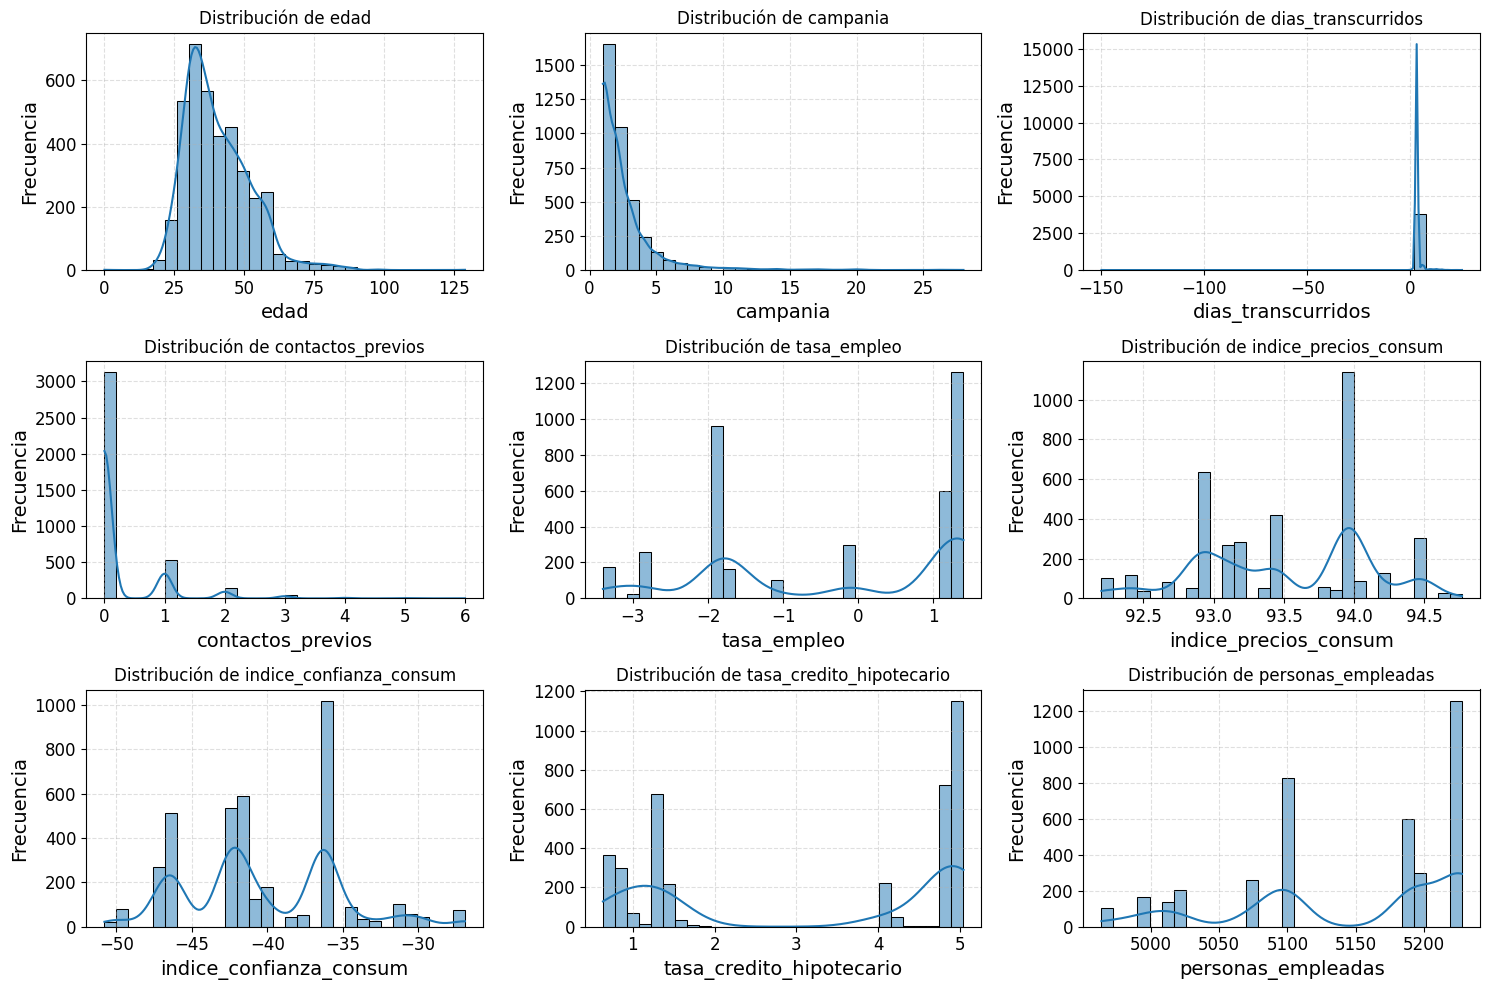

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extraer columnas numéricas
numerical_cols = DATASET_CHALLENGE.select_dtypes(include='number').columns.tolist()

# Crear figura y ejes (hasta 9 variables)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Graficar cada variable en su subplot
for i, col in enumerate(numerical_cols[:9]):  # Máximo 9 variables
    sns.histplot(DATASET_CHALLENGE[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")
    axes[i].grid(True, linestyle='--', alpha=0.4)

# Quitar subplots vacíos si hay menos de 9 variables
for j in range(len(numerical_cols), 9):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


###5.2 Visualizar variables categóricas vs. resultado

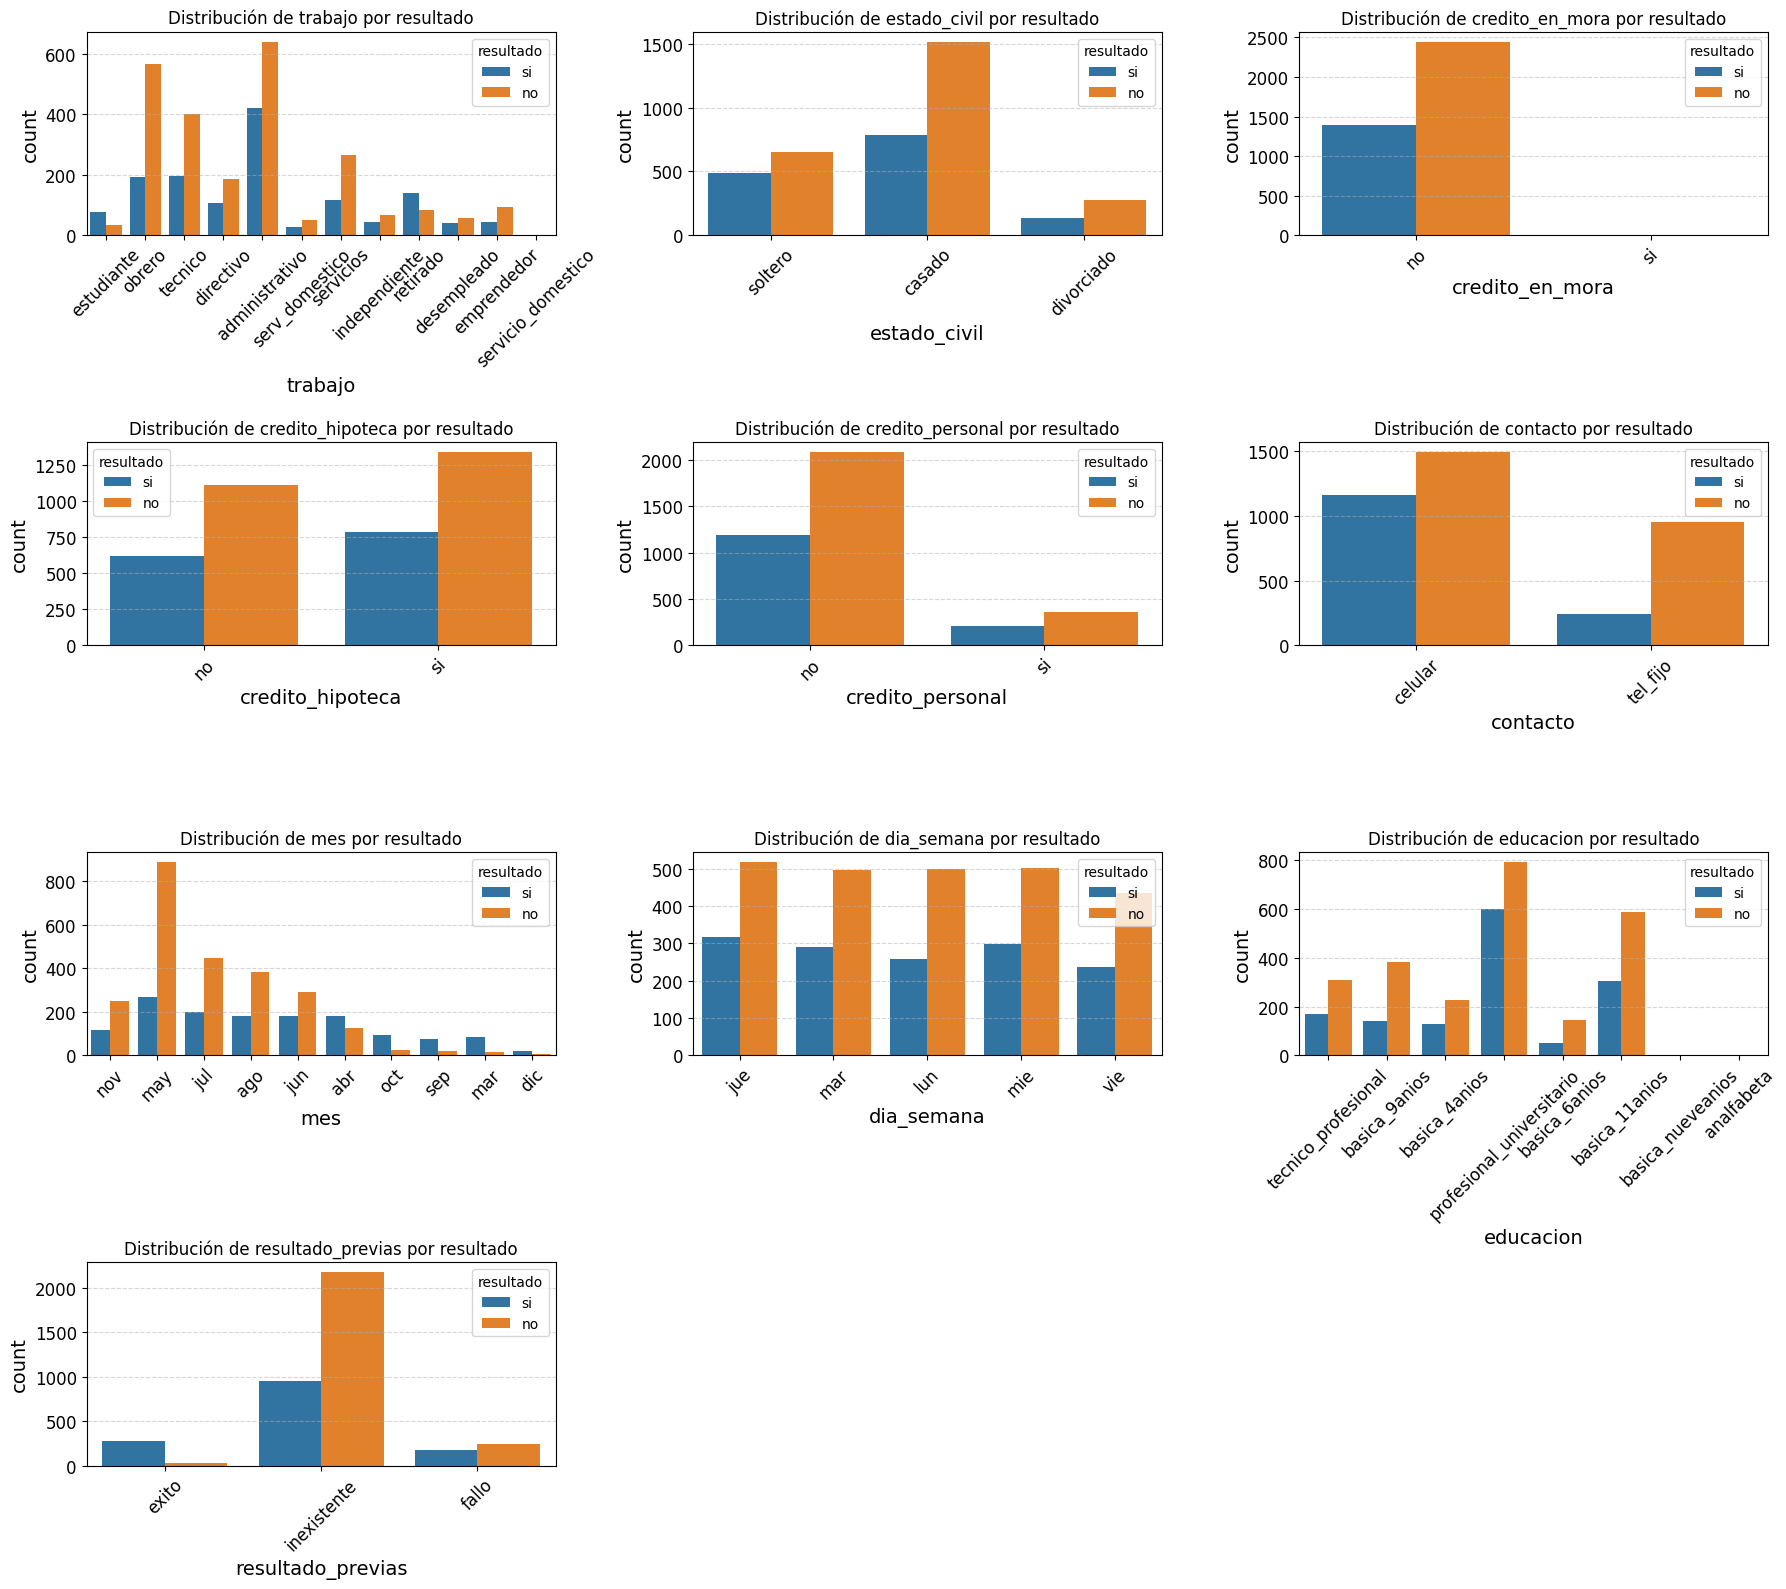

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar columnas categóricas excluyendo 'resultado' y 'codigo_cliente'
categorical_cols = DATASET_CHALLENGE.select_dtypes(include='object').drop(columns='resultado').columns
categorical_cols = [col for col in categorical_cols if col != 'codigo_cliente']

# Crear una cuadrícula adecuada (3 columnas)
n = len(categorical_cols)
ncols = 3
nrows = (n + ncols - 1) // ncols  # redondeo hacia arriba

# Crear subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 4 * nrows))
axes = axes.flatten()

# Generar gráfico para cada variable
for i, col in enumerate(categorical_cols):
    sns.countplot(data=DATASET_CHALLENGE, x=col, hue='resultado', ax=axes[i])
    axes[i].set_title(f'Distribución de {col} por resultado')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

# Eliminar subplots vacíos si hay menos de nrows*ncols
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


###5.3 Correlación entre variables numéricas y objetivo

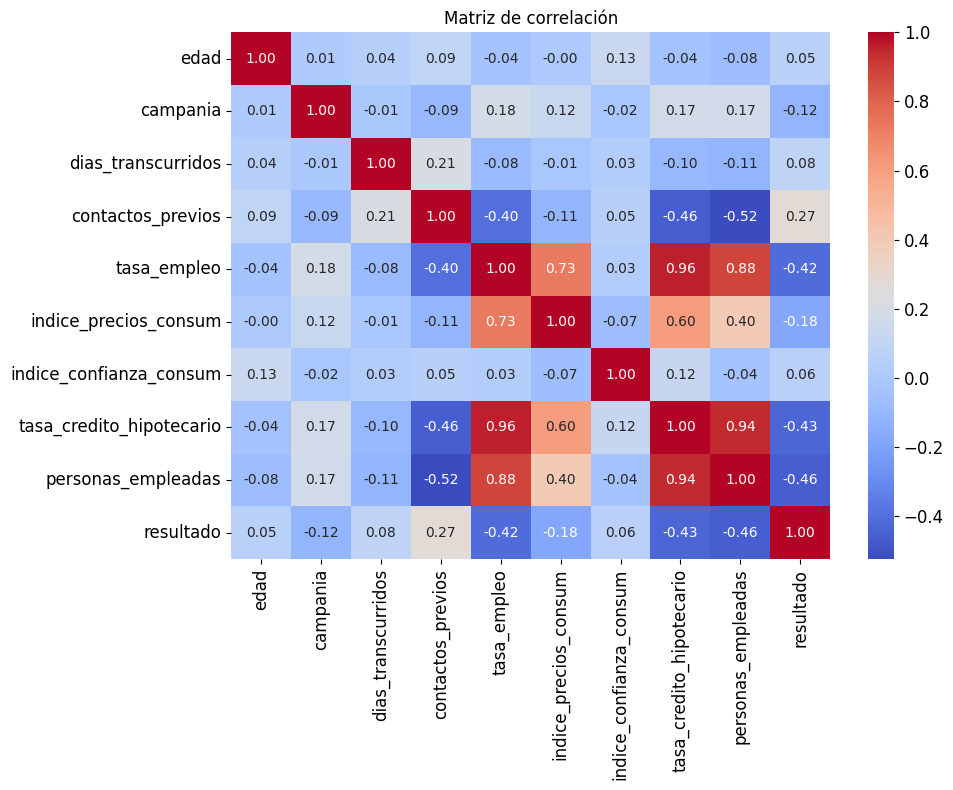

In [ ]:
# Convertir 'resultado' a 0/1 para análisis de correlación
df_corr = DATASET_CHALLENGE.copy()
df_corr['resultado'] = LabelEncoder().fit_transform(df_corr['resultado'])

# Calcular matriz de correlación
corr_matrix = df_corr[numerical_cols + ['resultado']].corr()

# Visualizar correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()


###5.4 Preguntas clave que puedes responder con EDA

### Análisis Exploratorio Basado en Correlaciones

A continuación, se formulan y responden preguntas clave sobre los factores que pueden influir en la contratación del CDT por parte de los clientes, basándonos en la matriz de correlación:



####  ¿Influye el número de contactos previos en la tasa de conversión?

- **Variable analizada:** contactos_previos
- **Correlación con resultado:** **+0.27**
- **Interpretación:** Existe una **correlación positiva moderada**, lo que sugiere que los clientes que han sido contactados antes tienen más probabilidad de aceptar el CDT. La experiencia previa con campañas puede incrementar la confianza o familiaridad con el producto.



####  ¿Influye el número de llamadas en esta campaña (campaña)?

- **Variable analizada:** campaña
- **Correlación con resultado:** **-0.12**
- **Interpretación:** Se observa una **correlación débil negativa**, lo que sugiere que hacer muchas llamadas durante una misma campaña no necesariamente mejora las conversiones. Incluso podría resultar contraproducente por generar molestia en el cliente.



####  ¿Tiene impacto la variable dias_transcurridos (desde el último contacto)?

- **Variable analizada:** dias_transcurridos
- **Correlación con resultado:** **+0.08**
- **Interpretación:** La correlación es baja, pero positiva. Podría indicar que un mayor tiempo entre campañas no afecta negativamente la conversión, aunque el efecto no es fuerte.



####  ¿Existe relación entre la tasa de empleo del país y la contratación del CDT?

- **Variable analizada:** tasa_empleo
- **Correlación con resultado:** **-0.42**
- **Interpretación:** Hay una **correlación negativa moderada**, lo que sugiere que en períodos de menor empleo, los clientes podrían estar más inclinados a aceptar un CDT como alternativa segura o por necesidad financiera.



####  ¿Afecta el índice de precios al consumidor (inflación) a la decisión?

- **Variable analizada:** indice_precios_consum
- **Correlación con resultado:** **-0.18**
- **Interpretación:** Existe una correlación negativa leve. Una mayor inflación podría desalentar la contratación del CDT debido a la percepción de menor poder adquisitivo o menor rentabilidad.



####  ¿Qué efecto tiene la confianza del consumidor?

- **Variable analizada:** indice_confianza_consum
- **Correlación con resultado:** **-0.06**
- **Interpretación:** La correlación es muy débil, lo que sugiere que este indicador macroeconómico **no tiene un impacto directo fuerte** sobre la decisión individual del cliente.



####  ¿La tasa de crédito hipotecario influye?

- **Variable analizada:** tasa_credito_hipotecario
- **Correlación con resultado:** **-0.43**
- **Interpretación:** Existe una correlación negativa moderada. Tasas más altas podrían llevar a que los clientes opten por productos de ahorro como el CDT en lugar de endeudarse.



####  ¿El número de personas empleadas guarda relación?

- **Variable analizada:** personas_empleadas
- **Correlación con resultado:** **-0.46**
- **Interpretación:** Es una de las correlaciones negativas más fuertes. Una menor cantidad de personas empleadas parece estar asociada a una mayor aceptación del CDT, posiblemente como una estrategia de seguridad financiera.



#### Conclusión General

Las variables macroeconómicas como tasa_empleo, tasa_credito_hipotecario y personas_empleadas muestran una relación **moderadamente inversa** con la contratación del CDT, lo cual sugiere que en contextos económicos desfavorables los clientes podrían preferir productos financieros más conservadores. Además, los **contactos previos** con los clientes tienen un efecto positivo, lo que destaca la importancia del historial de campañas anteriores.


### Tabla resumen: Correlación de variables numéricas con resultado

| Variable                    | Correlación con resultado | Tipo de relación     |
|----------------------------|---------------------------|----------------------|
| contactos_previos          | 0.27                      | Moderada positiva    |
| dias_transcurridos         | 0.08                      | Débil positiva       |
| edad                       | 0.05                      | Muy débil positiva   |
| indice_confianza_consum    | -0.06                     | Muy débil negativa   |
| indice_precios_consum      | -0.18                     | Débil negativa       |
| campania                   | -0.12                     | Débil negativa       |
| tasa_empleo                | -0.42                     | Moderada negativa    |
| tasa_credito_hipotecario   | -0.43                     | Moderada negativa    |
| personas_empleadas         | -0.46                     | Moderada negativa    |


#**6. Modelado Supervisado**
Se entrenara uno o varios modelos de clasificación que predigan la variable resultado (si/no contratación del CDT), evaluar su desempeño con métricas apropiadas y seleccionar el mejor.

###6.1 Dividir los datos en entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir en variables predictoras (X) y variable objetivo (y)
X = X_encoded  # obtenido tras codificación
y = y_encoded  # 0 = no, 1 = sí

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

###6.2 Escalar las variables (si usarás modelos sensibles a escala)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

###6.3 Entrenar modelos base (Sin ajuste de Hiperparametros)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Entrenar modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
}

for name, model in models.items():
    X_train_model = X_train
    X_test_model  = X_test

    model.fit(X_train_model, y_train)
    y_pred = model.predict(X_test_model)
    f1 = f1_score(y_test, y_pred)
    print(f"\n{name} - F1 Score: {f1:.4f}")
    print(classification_report(y_test, y_pred, target_names=['no', 'si']))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression - F1 Score: 0.6492
              precision    recall  f1-score   support

          no       0.79      0.89      0.83       490
          si       0.75      0.57      0.65       280

    accuracy                           0.77       770
   macro avg       0.77      0.73      0.74       770
weighted avg       0.77      0.77      0.77       770


Random Forest - F1 Score: 0.6574
              precision    recall  f1-score   support

          no       0.79      0.88      0.83       490
          si       0.74      0.59      0.66       280

    accuracy                           0.78       770
   macro avg       0.77      0.74      0.75       770
weighted avg       0.77      0.78      0.77       770



###6.4 Ajuste de hiperparámetros usando GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# ==========================
# 1. Logistic Regression
# ==========================
# Escalar los datos (requerido para regresión logística)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Definición de grilla
param_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Búsqueda
grid_lr = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid=param_lr,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
grid_lr.fit(X_train_scaled, y_train)
print("🔍 Mejores hiperparámetros - Logistic Regression:")
print(grid_lr.best_params_)

# ==========================
# 2. Random Forest
# ==========================
param_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_rf,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)
print("🔍 Mejores hiperparámetros - Random Forest:")
print(grid_rf.best_params_)


🔍 Mejores hiperparámetros - Logistic Regression:
{'C': 0.01, 'solver': 'liblinear'}
🔍 Mejores hiperparámetros - Random Forest:
{'max_depth': 10, 'n_estimators': 200}


###6.5 Evaluación final de modelos ajustados

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# ==========================
# 1. Logistic Regression
# ==========================
logreg_final = LogisticRegression(
    C=0.01, solver='liblinear', max_iter=1000
)
logreg_final.fit(X_train_scaled, y_train)
y_pred_lr = logreg_final.predict(X_test_scaled)

print("📊 Logistic Regression - Métricas finales")
print(classification_report(y_test, y_pred_lr, target_names=['no', 'si']))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))

# ==========================
# 2. Random Forest
# ==========================
rf_final = RandomForestClassifier(
    n_estimators=200, max_depth=10, random_state=42
)
rf_final.fit(X_train, y_train)
y_pred_rf = rf_final.predict(X_test)

print("\n📊 Random Forest - Métricas finales")
print(classification_report(y_test, y_pred_rf, target_names=['no', 'si']))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))


📊 Logistic Regression - Métricas finales
              precision    recall  f1-score   support

          no       0.78      0.89      0.83       490
          si       0.74      0.57      0.65       280

    accuracy                           0.77       770
   macro avg       0.76      0.73      0.74       770
weighted avg       0.77      0.77      0.77       770

Matriz de confusión:
 [[434  56]
 [119 161]]
F1-score: 0.647887323943662

📊 Random Forest - Métricas finales
              precision    recall  f1-score   support

          no       0.79      0.91      0.84       490
          si       0.78      0.58      0.66       280

    accuracy                           0.79       770
   macro avg       0.78      0.74      0.75       770
weighted avg       0.79      0.79      0.78       770

Matriz de confusión:
 [[444  46]
 [118 162]]
F1-score: 0.6639344262295082


📊 Logistic Regression - Métricas finales
              precision    recall  f1-score   support

          no       0.78      0.89      0.83       490
          si       0.74      0.57      0.65       280

    accuracy                           0.77       770
   macro avg       0.76      0.73      0.74       770
weighted avg       0.77      0.77      0.77       770

F1-score: 0.647887323943662

📊 Random Forest - Métricas finales
              precision    recall  f1-score   support

          no       0.79      0.91      0.84       490
          si       0.78      0.58      0.66       280

    accuracy                           0.79       770
   macro avg       0.78      0.74      0.75       770
weighted avg       0.79      0.79      0.78       770

F1-score: 0.6639344262295082


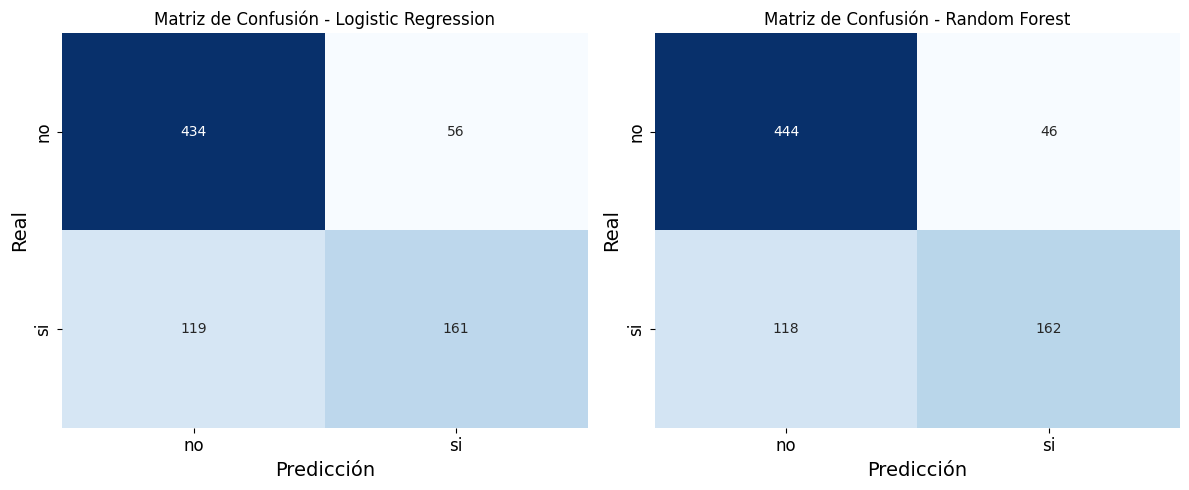

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Etiquetas
fault_type = ['no', 'si']

# ==========================
# 1. Logistic Regression
# ==========================
logreg_final = LogisticRegression(C=0.01, solver='liblinear', max_iter=1000)
logreg_final.fit(X_train_scaled, y_train)
y_pred_lr = logreg_final.predict(X_test_scaled)
cm_lr = confusion_matrix(y_test, y_pred_lr)

print("📊 Logistic Regression - Métricas finales")
print(classification_report(y_test, y_pred_lr, target_names=fault_type))
print("F1-score:", f1_score(y_test, y_pred_lr))

# ==========================
# 2. Random Forest
# ==========================
rf_final = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_final.fit(X_train, y_train)
y_pred_rf = rf_final.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("\n📊 Random Forest - Métricas finales")
print(classification_report(y_test, y_pred_rf, target_names=fault_type))
print("F1-score:", f1_score(y_test, y_pred_rf))

# ==========================
# Mostrar ambas matrices de confusión
# ==========================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap="Blues", xticklabels=fault_type, yticklabels=fault_type, cbar=False)
plt.title("Matriz de Confusión - Logistic Regression")
plt.xlabel("Predicción")
plt.ylabel("Real")

plt.subplot(1, 2, 2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Blues", xticklabels=fault_type, yticklabels=fault_type, cbar=False)
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")

plt.tight_layout()
plt.show()

## **Guardar Modelos entrenados**

In [ ]:
import joblib
# Guardar modelo Random Forest
joblib.dump(rf_final, 'rf_model.pkl')

['rf_model.pkl']

In [ ]:
# Guardar modelo Logistic Regression
joblib.dump(logreg_final, 'logreg_model.pkl')

['logreg_model.pkl']

## Descargando Modelos

In [ ]:
from google.colab import files
files.download('logreg_model.pkl')
files.download('rf_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Guardar imágenes generadas (distribución, correlación, matrices de confusión)

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=DATASET_CHALLENGE, x='resultado', palette='pastel')
plt.title("Distribución de clases 'resultado'")
plt.tight_layout()
plt.savefig('distribucion_resultado.png')
plt.close()

/tmp/ipython-input-68-572159497.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=DATASET_CHALLENGE, x='resultado', palette='pastel')


In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de correlación")
plt.tight_layout()
plt.savefig('matriz_correlacion.png')
plt.close()


In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap="Blues", xticklabels=fault_type, yticklabels=fault_type, cbar=False)
plt.title("Confusión - Logistic Regression")
plt.xlabel("Predicción")
plt.ylabel("Real")

plt.subplot(1, 2, 2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Blues", xticklabels=fault_type, yticklabels=fault_type, cbar=False)
plt.title("Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")

plt.tight_layout()
plt.savefig('matrices_confusion.png')
plt.close()

In [ ]:
files.download('distribucion_resultado.png')
files.download('matriz_correlacion.png')
files.download('matrices_confusion.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Guardar imagen: Distribución de variables numéricas (subplots 3×3)

In [ ]:
# Subplots de histogramas para variables numéricas
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = DATASET_CHALLENGE.select_dtypes(include='number').columns.tolist()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols[:9]):
    sns.histplot(DATASET_CHALLENGE[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")
    axes[i].grid(True, linestyle='--', alpha=0.4)

# Quitar subplots vacíos
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('distribucion_variables_numericas.png')
plt.close()

## Guardar imagen: Variables categóricas vs. resultado (en subplots)


In [ ]:
categorical_cols = DATASET_CHALLENGE.select_dtypes(include='object').drop(columns='resultado').columns
categorical_cols = [col for col in categorical_cols if col != 'codigo_cliente']

n = len(categorical_cols)
ncols = 3
nrows = (n + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 4 * nrows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=DATASET_CHALLENGE, x=col, hue='resultado', ax=axes[i])
    axes[i].set_title(f'{col} vs resultado')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('categoricas_vs_resultado.png')
plt.close()


In [ ]:
files.download('distribucion_variables_numericas.png')
files.download('categoricas_vs_resultado.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>